In [2]:
!pip install yfinance 
!pip install pandas
!pip install matplotlib 
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


First step is to scrape the historical data for the two companies (Alphabet and Meta). We will do that using the yfinance library to get the data.

In [3]:
import yfinance as yf
import pandas as pd
tickers = ["GOOGL", "META"]
start_date = "2012-05-18"
end_date = "2024-11-01"

data = yf.download(tickers, start=start_date, end=end_date, group_by="ticker")

for ticker in tickers:
    data[ticker].to_csv(f"{ticker}_stock_data.csv")

print("Data saved correctly!")

[*********************100%***********************]  2 of 2 completed

Data saved correctly!


Next part is to dive into the EDA (Exploratory Data Analysis) to better understand the data, identify potential issues.

In [4]:
google_data = pd.read_csv("GOOGL_stock_data.csv", parse_dates=["Date"])
meta_data = pd.read_csv("META_stock_data.csv", parse_dates=["Date"])

print("Google:")
print(google_data.head())
print("\nMeta:")
print(meta_data.head())

Google:
        Date       Open       High        Low      Close  Adj Close     Volume
0 2012-05-18  15.643143  15.826326  14.932432  15.025025  14.987913  238701060
1 2012-05-21  15.027778  15.407658  15.015015  15.368118  15.330158  122892984
2 2012-05-22  15.351351  15.360611  14.914915  15.035035  14.997898  121953924
3 2012-05-23  15.056306  15.255255  14.942943  15.251752  15.214080  126996876
4 2012-05-24  15.244244  15.313313  14.986737  15.106607  15.069293   75576348

Meta:
        Date       Open       High        Low      Close  Adj Close     Volume
0 2012-05-18  42.049999  45.000000  38.000000  38.230000  38.115238  573576400
1 2012-05-21  36.529999  36.660000  33.000000  34.029999  33.927845  168192700
2 2012-05-22  32.610001  33.590000  30.940001  31.000000  30.906942  101786600
3 2012-05-23  31.370001  32.500000  31.360001  32.000000  31.903940   73600000
4 2012-05-24  32.950001  33.209999  31.770000  33.029999  32.930851   50237200


In [5]:
print(google_data.isnull().sum())
print(meta_data.isnull().sum())
# No missing values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
print(google_data.dtypes)
print(meta_data.dtypes)

print(google_data.describe())
print(meta_data.describe())

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
                                Date         Open         High          Low  \
count                           3134  3134.000000  3134.000000  3134.000000   
mean   2018-08-10 21:41:41.850670080    68.901881    69.616763    68.203059   
min              2012-05-18 00:00:00    14.022523    14.127127    13.926927   
25%              2015-07-01 06:00:00    30.288707    30.444750    30.075900   
50%              2018-08-09 12:00:00    55.138750    55.746000    54.470749   
75%              2021-09-20 18:00:00   103.294750   104.968748   102.475000   
max              2024-10-31

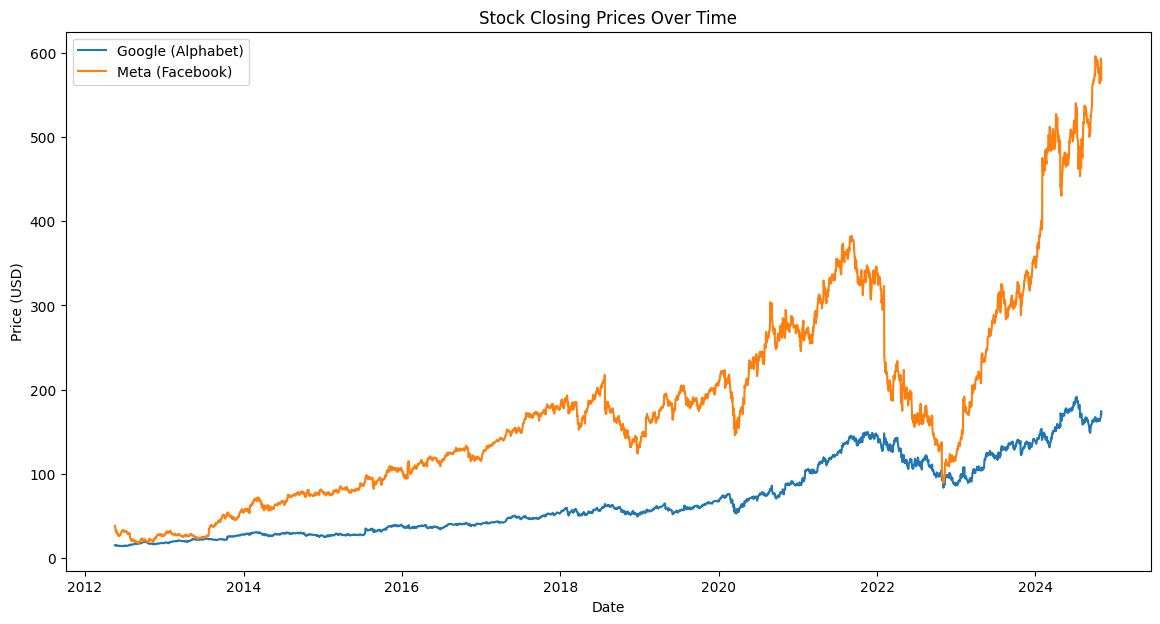

In [7]:
#Visualising the closing price trends over time
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(google_data["Date"], google_data["Close"], label="Google (Alphabet)")
plt.plot(meta_data["Date"], meta_data["Close"], label="Meta (Facebook)")
plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

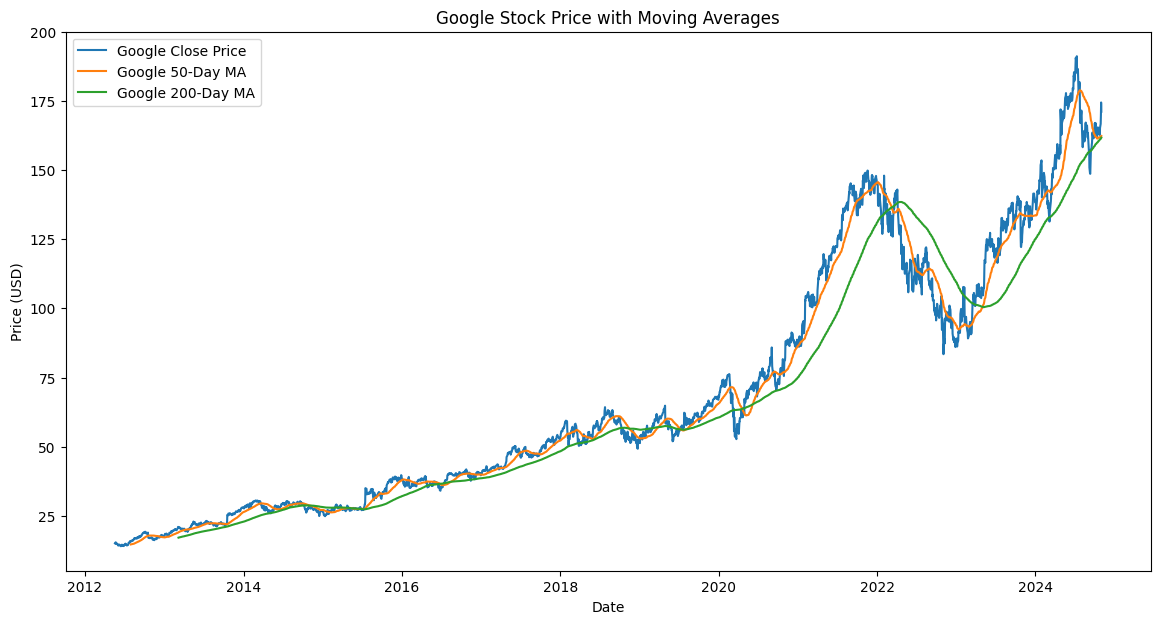

In [8]:
#Calculating the moving averages and then plotting with those. Google
google_data["50_MA"] = google_data["Close"].rolling(window=50).mean()
meta_data["50_MA"] = meta_data["Close"].rolling(window=50).mean()

google_data["200_MA"] = google_data["Close"].rolling(window=200).mean()
meta_data["200_MA"] = meta_data["Close"].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(google_data["Date"], google_data["Close"], label="Google Close Price")
plt.plot(google_data["Date"], google_data["50_MA"], label="Google 50-Day MA")
plt.plot(google_data["Date"], google_data["200_MA"], label="Google 200-Day MA")
plt.title("Google Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

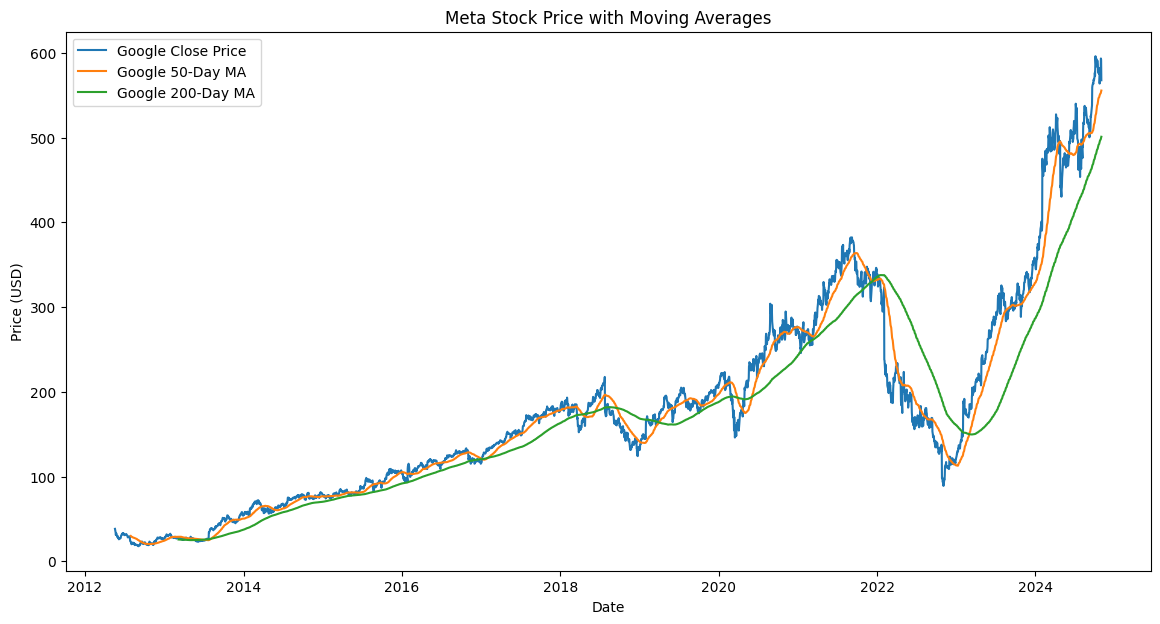

In [9]:
#Calculating the moving averages and then plotting with those. Meta

plt.figure(figsize=(14, 7))
plt.plot(meta_data["Date"], meta_data["Close"], label="Google Close Price")
plt.plot(meta_data["Date"], meta_data["50_MA"], label="Google 50-Day MA")
plt.plot(meta_data["Date"], meta_data["200_MA"], label="Google 200-Day MA")
plt.title("Meta Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

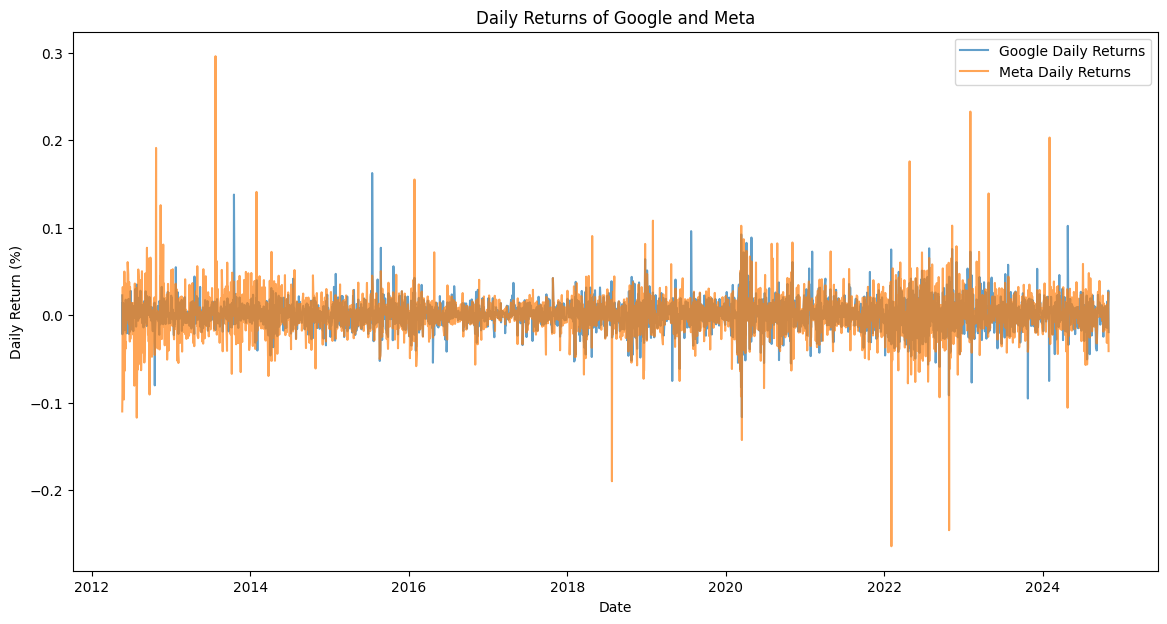

In [10]:
#Daily returns
google_data["Daily_Return"] = google_data["Close"].pct_change()
meta_data["Daily_Return"] = meta_data["Close"].pct_change()

# plotting
plt.figure(figsize=(14, 7))
plt.plot(google_data["Date"], google_data["Daily_Return"], label="Google Daily Returns", alpha=0.7)
plt.plot(meta_data["Date"], meta_data["Daily_Return"], label="Meta Daily Returns", alpha=0.7)
plt.title("Daily Returns of Google and Meta")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.show()

In [11]:
#Correlation between the sets
merged_data = pd.merge(google_data[["Date", "Daily_Return"]], 
                       meta_data[["Date", "Daily_Return"]], 
                       on="Date", suffixes=("_Google", "_Meta"))

correlation = merged_data[["Daily_Return_Google", "Daily_Return_Meta"]].corr()
print("\nCorrelation between Google and Meta Daily Returns:")
print(correlation)



Correlation between Google and Meta Daily Returns:
                     Daily_Return_Google  Daily_Return_Meta
Daily_Return_Google             1.000000           0.537815
Daily_Return_Meta               0.537815           1.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example for Google stock
# Create lag features
google_data["Lag_1"] = google_data["Close"].shift(1)
google_data["Lag_2"] = google_data["Close"].shift(2)
google_data["50_MA"] = google_data["Close"].rolling(window=50).mean()
google_data["200_MA"] = google_data["Close"].rolling(window=200).mean()

# Drop missing values created by lag or moving averages
google_data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = google_data[["Lag_1", "Lag_2", "50_MA", "200_MA"]]
y = google_data["Close"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test_scaled)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 6.1939341832110495
Mean Absolute Error: 1.8014500183846516
R² Score: 0.9917461375534582


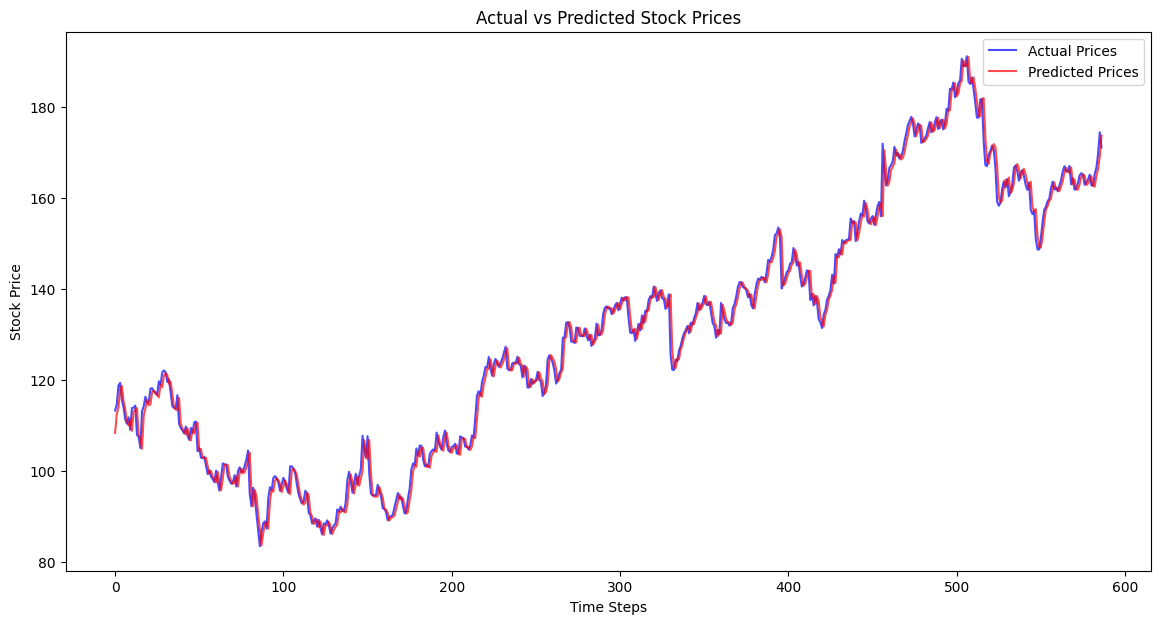

In [19]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label="Actual Prices", color="blue", alpha=0.7)
plt.plot(y_pred, label="Predicted Prices", color="red", alpha=0.7)
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

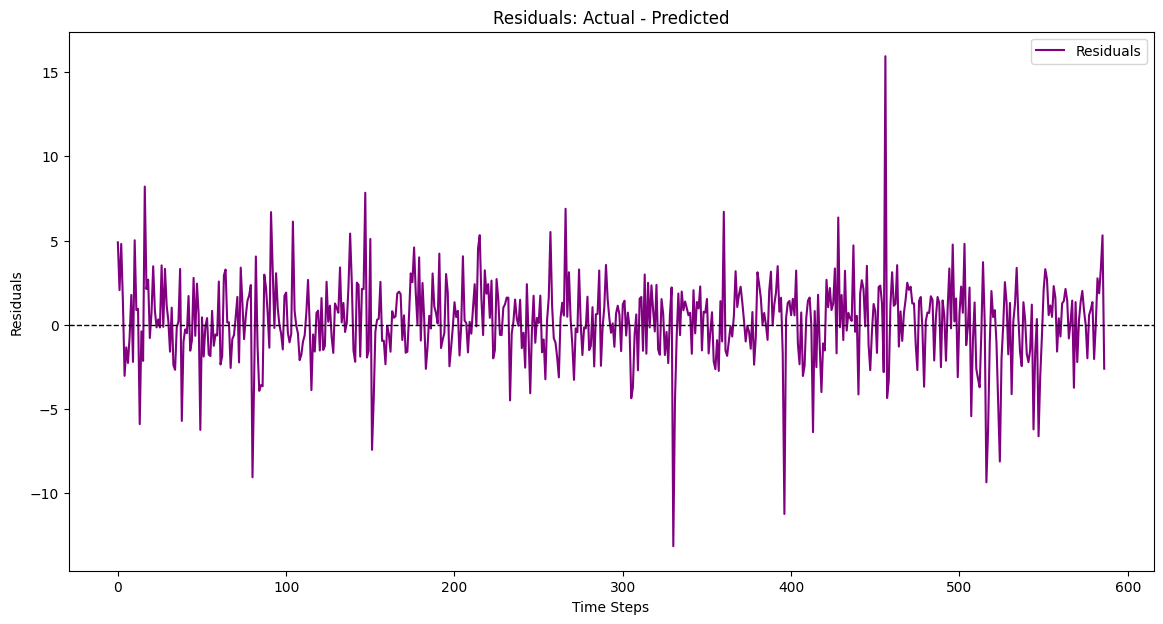

In [20]:
# Calculate residuals
residuals = y_test.values - y_pred

# Plot residuals
plt.figure(figsize=(14, 7))
plt.plot(residuals, label="Residuals", color="purple")
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
plt.title("Residuals: Actual - Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Residuals")
plt.legend()
plt.show()
